In [1]:
%matplotlib inline

from math import ceil
from math import log2

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

#### Compute the terms in the gap

In [2]:
def get_rejection_precision(m):
    return ceil(log2(m))

In [3]:
def get_gap(m):
    k = ceil(log2(m))
    term1 = log2(2**k/m)
    term2 = (2**k-m)/m * log2(2**k/(2**k-m)) if m != 2**k else 0
    term3 = 2 * 2**k/m
    return (term1, term2, term3)

In [4]:
Ms = np.arange(2, 2**13, 2)

In [5]:
gaps = list(map(get_gap, Ms))

#### Plot the three elements of the gap

In [6]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['font.sans-serif'] = 'Computer Modern Sans Serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'

In [7]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

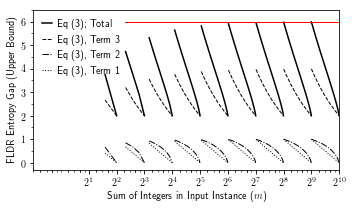

In [8]:
colors = ['black'] * 10
fig, ax = plt.subplots()

for i in range(1, 13):
    labels = [None] * 4
    if i == 1:
        labels = [
            'Eq~(3), Term 1',
            'Eq~(3), Term 2',
            'Eq~(3), Term 3',
            'Eq~(3); Total',
        ]
    xs = np.arange(2**i+1, 2**(i+1)+1)
    gaps = list(map(get_gap, xs))
    ax.plot(xs, [sum(g) for g in gaps], label=labels[3], color=colors[3])
    ax.plot(xs, [g[2] for g in gaps], label=labels[2], color=colors[2], linestyle='--', linewidth=1)
    ax.plot(xs, [g[1] for g in gaps], label=labels[1], color=colors[1], linestyle='-.', linewidth=1)
    ax.plot(xs, [g[0] for g in gaps], label=labels[0], color=colors[0], linestyle=':', linewidth=1)

# ax.scatter(Zs, [g[0] for g in gaps], marker='.', label='Rejection Dist. Entropy', s=2)
# ax.scatter(Zs, [g[1] for g in gaps], marker='.', label='Rejection Probability', s=2)
# ax.scatter(Zs, [g[2] for g in gaps], marker='.', label='Sampling Toll', s=2)
# ax.scatter(Zs, [g[0] + g[1] + g[2] for g in gaps], marker='.', label='Total Gap', s=2)

ax.set_xscale('log', basex=2)
ax.set_xlabel('Sum of Integers in Input Instance ($m$)')
ax.set_ylabel('FLDR Entropy Gap (Upper Bound)')

ax.legend(loc='upper left', framealpha=0, handlelength=1, handletextpad=0.5)

ax.yaxis.set_major_locator(
    ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(
    ticker.MultipleLocator(.5))

ax.xaxis.set_major_locator(
    ticker.LogLocator(base=2., subs=(1.,), numticks=24))

ax.xaxis.set_minor_locator(
    ticker.LogLocator(base=2., subs=np.arange(2, 10)*.1, numticks=200))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())

ax.set_xticks([2**i for i in range(1, 14)])
ax.set_xlim([.5, 2**10])
ax.set_ylim([None, 6.5])
ax.axhline(y=6, xmin=0.3, color='red', linewidth=1)

fig.set_size_inches(5, 3)
fig.set_tight_layout(True)
fig.set_facecolor('white')
for ext in ['pdf', 'png']:
    fig.savefig('figure-3-fldr-gap.%s' % (ext,))